Lets now train the selected model on the entire training dataset

In [1]:
# Load variables, check if it is loaded

%store -r X_subset
%store -r y_subset

print(X_subset)
print(y_subset)

        HighBP  HighChol  CholCheck        BMI    Smoker  Stroke  \
28087      1.0       1.0        1.0  32.000000  1.000000     0.0   
36258      1.0       0.0        1.0  33.000000  1.000000     0.0   
210392     0.0       0.0        1.0  22.000000  0.000000     0.0   
102508     0.0       1.0        1.0  26.000000  1.000000     0.0   
450537     0.0       0.0        1.0  23.215912  0.000000     0.0   
...        ...       ...        ...        ...       ...     ...   
636434     1.0       0.0        1.0  34.000000  0.000000     0.0   
484182     1.0       1.0        1.0  28.155724  1.000000     0.0   
280143     1.0       0.0        1.0  36.000000  0.784786     0.0   
39194      0.0       0.0        1.0  26.000000  0.000000     0.0   
9903       1.0       1.0        1.0  35.000000  0.000000     0.0   

        HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  \
28087                    0.0           1.0  1.000000  0.000000   
36258                    0.0           0.0  1.00000

In [2]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(n_estimators=50, random_state=42)
final_model.fit(X_subset, y_subset)

RandomForestClassifier(n_estimators=50, random_state=42)

In [3]:
%store -r X_train
%store -r y_test
%store -r X_test
%store -r y_test
%store -r X
%store -r y

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the final model on the entire training dataset

final_model.fit(X_train, y_train)

# Evaluate the model on the test set

from sklearn.metrics import f1_score, classification_report

y_pred = final_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test Set F1 Score: {f1:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set F1 Score: 0.9256
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     42740
         1.0       0.98      0.97      0.98     42741
         2.0       0.91      0.88      0.90     42741

    accuracy                           0.93    128222
   macro avg       0.93      0.93      0.93    128222
weighted avg       0.93      0.93      0.93    128222



Now that we have trained the model on the test set, lets do some hyperparameter tuning with some modifications to make it faster

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import f1_score, classification_report

# Define the parameter distribution

param_dist = {
    'n_estimators': randint(50, 100),  # Reduced upper limit for faster search
    'max_depth': [None, 10, 20],  # Reduced number of depth options
    'min_samples_split': randint(2, 6),  # Reduced range
    'min_samples_leaf': randint(1, 3),  # Reduced range
    'bootstrap': [True, False]
}

# Initialize the Random Forest model

rf = RandomForestClassifier(random_state=42)

# Initialize Randomized Search

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='f1_macro', random_state=42)

# Use a smaller subset of the data for hyperparameter tuning

X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]

# Fit Randomized Search

random_search.fit(X_train_subset, y_train_subset)

# Get the best parameters and best score

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation F1 Score: {best_score:.4f}")

# Train the model with the best parameters

final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the model on the test set with parameters

y_pred = final_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test Set F1 Score: {f1:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 51}
Best Cross-Validation F1 Score: 0.5937
Test Set F1 Score: 0.6884
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78     42740
         1.0       0.71      0.67      0.69     42741
         2.0       0.60      0.59      0.60     42741

    accuracy                           0.69    128222
   macro avg       0.69      0.69      0.69    128222
weighted avg       0.69      0.69      0.69    128222



Feature importance, to know which features contribute most to predictions

Feature ranking:
1. feature 0 (0.2642587676991593)
2. feature 1 (0.17923330714660327)
3. feature 3 (0.0830821532374592)
4. feature 14 (0.08094035916050803)
5. feature 15 (0.07964834421005063)
6. feature 7 (0.047955543642842165)
7. feature 13 (0.041985235295963)
8. feature 6 (0.04044300770578933)
9. feature 4 (0.03549661299402214)
10. feature 17 (0.02574272234138959)
11. feature 8 (0.024644235848609884)
12. feature 10 (0.024173149653551315)
13. feature 9 (0.017683988428669594)
14. feature 12 (0.01755775210792582)
15. feature 16 (0.017355394504969052)
16. feature 2 (0.007790020035191403)
17. feature 11 (0.006989397394999192)
18. feature 5 (0.005020008592297205)


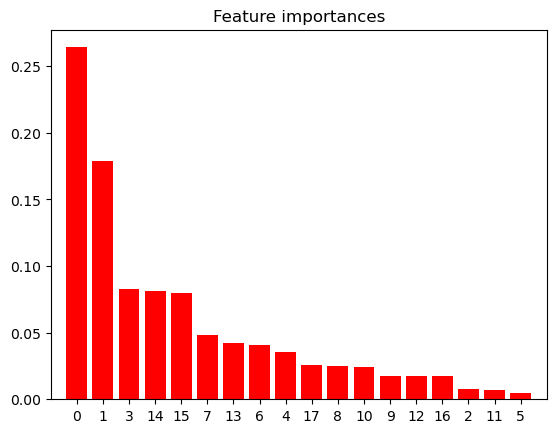

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model

importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


It seems that high blood pressure and cholesterol have the most importance here, which confirms one of my ideas that blood pressure is impactful in deciding if the person has diabetes or not.

Time to compare the results with other models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, classification_report

# Use a smaller subset of the data for initial comparison

X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]
X_test_subset = X_test[:1000]
y_test_subset = y_test[:1000]

# Initialize the models with limited iterations

models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'Neural Network': MLPClassifier(max_iter=100, random_state=42)
}

# Train and evaluate each model using the subset of the data

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train_subset, y_train_subset)
    y_pred = model.predict(X_test_subset)
    f1 = f1_score(y_test_subset, y_pred, average='macro')
    print(f"{model_name} Test Set F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_subset, y_pred))
    print("-" * 50)

# Comparing with the Random Forest model

print("Training and evaluating Random Forest with best hyperparameters...")
final_model.fit(X_train_subset, y_train_subset)
y_pred_rf = final_model.predict(X_test_subset)
f1_rf = f1_score(y_test_subset, y_pred_rf, average='macro')
print(f"Random Forest Test Set F1 Score: {f1_rf:.4f}")
print("Classification Report:")
print(classification_report(y_test_subset, y_pred_rf))
print("-" * 50)


Training and evaluating Logistic Regression...
Logistic Regression Test Set F1 Score: 0.5136
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.59      0.61       338
         1.0       0.43      0.36      0.39       329
         2.0       0.49      0.59      0.53       333

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.52      0.52      0.51      1000

--------------------------------------------------
Training and evaluating SVM...
SVM Test Set F1 Score: 0.5142
Classification Report:


c:\Users\turab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66       338
         1.0       0.42      0.31      0.36       329
         2.0       0.47      0.61      0.53       333

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.52      0.52      0.52      1000

--------------------------------------------------
Training and evaluating Gradient Boosting...
Gradient Boosting Test Set F1 Score: 0.6667
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       338
         1.0       0.64      0.62      0.63       329
         2.0       0.56      0.58      0.57       333

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

--------------------------------------------------
Training and evaluating 

c:\Users\turab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Its cross validation time

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define a smaller subset of data for faster execution

X_train_subset = X_train[:500]  
y_train_subset = y_train[:500]

# Define models with reduced parameters

models = {
    'Logistic Regression': LogisticRegression(max_iter=30, random_state=42),
    'SVM': SVC(random_state=42, probability=True),  # Quick evaluation
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=20, random_state=42),
    'Neural Network': MLPClassifier(max_iter=30, random_state=42, n_iter_no_change=5),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
}

# Define a function for cross-validation

def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=3, scoring='f1_macro', n_jobs=-1)  # 3-fold cross-validation
    return scores.mean(), scores.std()

# Evaluate all models

results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name} using cross-validation...")
    mean_score, std_dev = evaluate_model(model, X_train_subset, y_train_subset)
    results[model_name] = (mean_score, std_dev)
    print(f"{model_name} - Mean F1 Score: {mean_score:.4f} (+/- {std_dev:.4f})")
    print("-" * 50)


Evaluating Logistic Regression using cross-validation...
Logistic Regression - Mean F1 Score: 0.5007 (+/- 0.0404)
--------------------------------------------------
Evaluating SVM using cross-validation...
SVM - Mean F1 Score: 0.4812 (+/- 0.0456)
--------------------------------------------------
Evaluating Gradient Boosting using cross-validation...
Gradient Boosting - Mean F1 Score: 0.5666 (+/- 0.0563)
--------------------------------------------------
Evaluating Neural Network using cross-validation...
Neural Network - Mean F1 Score: 0.4168 (+/- 0.0221)
--------------------------------------------------
Evaluating Random Forest using cross-validation...
Random Forest - Mean F1 Score: 0.5344 (+/- 0.0062)
--------------------------------------------------


Gradient Boosting model has the highest mean F1 score

It has the highest average F1 score among the models, indicating better overall performance in terms of balancing precision and recall

standard deviation of the F1 score is high (0.0563), showing variability in its performance across folds

Lets tune the gradient model

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Define the parameter distribution

param_dist = {
    'n_estimators': randint(50, 100),  
    'learning_rate': uniform(0.01, 0.1),  
    'max_depth': randint(3, 5)  # Reduced range for speed
}

# Use a smaller subset for faster tuning

X_train_subset = X_train[:500]
y_train_subset = y_train[:500]

# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42), 
    param_distributions=param_dist, 
    n_iter=10,  
    cv=3,  
    scoring='f1_macro', 
    n_jobs=-1, 
    random_state=42
)

# Fit RandomizedSearchCV

random_search.fit(X_train_subset, y_train_subset)

# Best parameters and score

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_:.4f}")

# Retrieve the best model

best_gb_model = random_search.best_estimator_


Best parameters: {'learning_rate': 0.06247746602583892, 'max_depth': 3, 'n_estimators': 91}
Best score: 0.5930


Time to train the gradient model on the entire training dataset

In [10]:
# Train the final model using the entire training dataset with the best hyperparameters

best_gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.06247746602583892, n_estimators=91,
                           random_state=42)

and now to train on the test set

In [12]:
from sklearn.metrics import classification_report, f1_score

# Predict on the test set

y_pred = best_gb_model.predict(X_test)

# Calculate F1 Score

f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test Set F1 Score: {f1:.4f}")

# Print Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set F1 Score: 0.6928
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80     42740
         1.0       0.70      0.68      0.69     42741
         2.0       0.59      0.59      0.59     42741

    accuracy                           0.69    128222
   macro avg       0.69      0.69      0.69    128222
weighted avg       0.69      0.69      0.69    128222



Feature importance

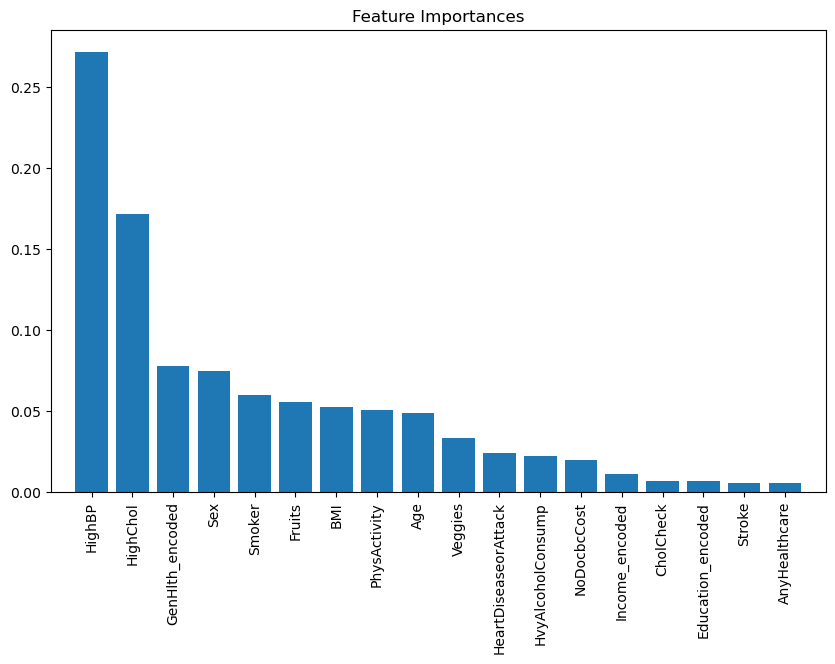

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances

importances = best_gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


It seems the features stay about the same, especially for the important ones